In [1]:
import sympy
sympy.init_printing()

# Governing Equations

Conservation of mass

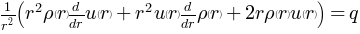

In [2]:
r = sympy.Symbol('r')
rho = sympy.Symbol('rho')
u = sympy.Symbol('u')
q = sympy.Symbol('q')
mass_conservation = sympy.Eq((1/r**2)*(r**2*rho(r)*u(r)).diff(r),q)
mass_conservation

Conservation of momentum

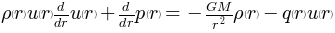

In [3]:
p = sympy.Symbol('p')
G = sympy.Symbol('G', positive=True)
M = sympy.Symbol('M', positive=True)
momentum_conservation = sympy.Eq(rho(r)*u(r)*u(r).diff(r) + p(r).diff(r),
                                 -rho(r)*G*M/r**2-q(r)*u(r))
momentum_conservation

Energy conservation

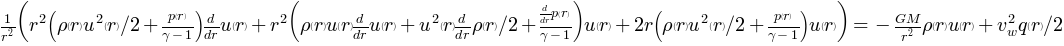

In [4]:
gamma = sympy.Symbol('gamma')
v_w = sympy.Symbol('v_w', positive=True)
energy_conservation = sympy.Eq((1/r**2)*(r**2*u(r)*(rho(r)*u(r)**2/2+p(r)/(gamma-1))).diff(r),
         -G*M*u(r)*rho(r)/r**2+v_w**2*q(r)/2)
energy_conservation

Mass source term

In [5]:
D = sympy.Symbol('D')
eta = sympy.Symbol('eta')
mass_source = D*r**(-eta)
mass_source

# Reduction to dimensionless variables

Bondi radius

In [6]:
bondi_radius = G*M/v_w**2
bondi_radius

Bondi density

In [7]:
temp = D*bondi_radius**(-eta)*(bondi_radius/v_w)
temp = sympy.expand_power_base(temp,force=True)
temp = temp.simplify()
bondi_density = temp
bondi_density

Mass conservation

In [8]:
tilde_rho = sympy.Symbol(r'\tilde{\rho}')
tilde_r = sympy.Symbol(r'\tilde{r}')
tilde_u = sympy.Symbol(r'\tilde{u}')
temp = mass_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
dimles_mass_conservation = temp
dimles_mass_conservation

Momentum conservation

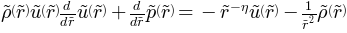

In [9]:
tilde_p = sympy.Symbol(r'\tilde{p}')
temp = momentum_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(q(r), mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(p(r).diff(r), bondi_density*v_w**2*tilde_p(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = temp.subs(p(r), bondi_density*v_w**2*tilde_p(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta/v_w, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta/v_w)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = temp.simplify()
dimles_momentum_conservation = temp
dimles_momentum_conservation

Energy conservation

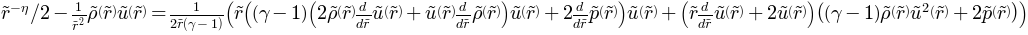

In [10]:
temp = energy_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(q(r), mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(p(r).diff(r), bondi_density*v_w**2*tilde_p(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = temp.subs(p(r), bondi_density*v_w**2*tilde_p(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta/v_w**2, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta/v_w**2)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = temp.simplify()
dimles_energy_conservation = temp
dimles_energy_conservation

Integral expressions

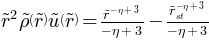

In [11]:
tilde_r_st = sympy.Symbol(r'\tilde{r}_{st}')
temp = tilde_r**(-eta)
temp *= tilde_r**2
temp = temp.simplify()
temp = temp.integrate(tilde_r,conds='none')
temp = temp - temp.subs(tilde_r, tilde_r_st)
temp = sympy.Eq(tilde_r**2*tilde_rho(tilde_r)*tilde_u(tilde_r), temp)
integral_mass_conservation = temp
integral_mass_conservation

Verification

In [12]:
temp = integral_mass_conservation
temp = temp.lhs - temp.rhs
temp = temp.diff(tilde_r)
temp = temp.subs(sympy.solve(dimles_mass_conservation,
                             tilde_rho(tilde_r).diff(tilde_r),dict=True)[0])
temp = temp.simplify()
temp

Energy conservation

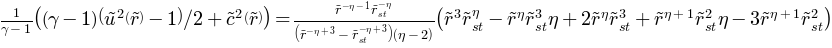

In [32]:
tilde_c = sympy.Symbol(r'\tilde{c}')
temp = -integral_mass_conservation.rhs
temp /= tilde_r**2
temp = temp.expand()
temp = temp.integrate(tilde_r,conds='none')
temp = temp - temp.subs(tilde_r, tilde_r_st)
temp = temp.simplify()
temp = temp.subs(eta**2-5*eta+6, (eta-2)*(eta-3))
temp = sympy.Eq(tilde_u(tilde_r)**2/2-sympy.Rational(1,2) + tilde_c(tilde_r)**2/(gamma-1),
               temp/integral_mass_conservation.rhs)
temp = temp.simplify()
integral_energy_conservation = temp
integral_energy_conservation